In [8]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import copy

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.3

In [9]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW    = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2EnsgID = MitoCarta[['Symbol','EnsemblGeneID']].set_index('Symbol')['EnsemblGeneID'].to_dict()
name2UniprotID = MitoCarta[['Symbol','UniProt']].set_index('Symbol')['UniProt'].to_dict()

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['EnsemblGeneIDs'] = ''
MitoPW['UniProtIDs'] = ''
for i in range(len(MitoPW)):

    # Collecting Ensembl gene IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2EnsgID[gene]) == float : continue
        MitoPW.iloc[i,4] += name2EnsgID[gene].replace('|',',') + ','
    MitoPW.iloc[i,4] = MitoPW.iloc[i,4][:-1]

    # Collecting UniProt IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2UniprotID[gene]) == float : continue
        MitoPW.iloc[i,5] += name2UniprotID[gene].replace('|',',') + ','
    MitoPW.iloc[i,5] = MitoPW.iloc[i,5][:-1]

MitoPW = MitoPW.set_index('MitoPathway',drop=True)

display(MitoPW)


# Ensembl_Genesets = {
#     # 'OXPHOS subunits' : pd.DataFrame({'gene_id' : MitoPW.loc['OXPHOS subunits','EnsemblGeneIDs'].split(',')}),
#     # 'TCA cycle' : pd.DataFrame({'gene_id' : MitoPW.loc['TCA cycle','EnsemblGeneIDs'].split(',')}),
#     # 'Lipid metabolism' : pd.DataFrame({'gene_id' : MitoPW.loc['Lipid metabolism','EnsemblGeneIDs'].split(',')}),
#     # 'Fatty acid oxidation' : pd.DataFrame({'gene_id' : MitoPW.loc['Fatty acid oxidation','EnsemblGeneIDs'].split(',')}),
#     # 'Mitochondrial ribosome' : pd.DataFrame({'gene_id' : MitoPW.loc['Mitochondrial ribosome','EnsemblGeneIDs'].split(',')}),
#     'All MitoCarta' : MitoCarta[['EnsemblGeneID']].drop_duplicates().rename(columns={'EnsemblGeneID':'gene_id'})
# }
Uniprot_Genesets = {
    'OXPHOS subunits' : pd.DataFrame({'uniprot_id' : MitoPW.loc['OXPHOS subunits','UniProtIDs'].split(',')}),
    'CI subunits' : pd.DataFrame({'uniprot_id' : MitoPW.loc['CI subunits','UniProtIDs'].split(',')}),
    'CII subunits' : pd.DataFrame({'uniprot_id' : MitoPW.loc['CII subunits','UniProtIDs'].split(',')}),
    'CIII subunits' : pd.DataFrame({'uniprot_id' : MitoPW.loc['CIII subunits','UniProtIDs'].split(',')}),
    'CIV subunits' : pd.DataFrame({'uniprot_id' : MitoPW.loc['CIV subunits','UniProtIDs'].split(',')}),
    'CV subunits' : pd.DataFrame({'uniprot_id' : MitoPW.loc['CV subunits','UniProtIDs'].split(',')}),
    'TCA cycle' : pd.DataFrame({'uniprot_id' : MitoPW.loc['TCA cycle','UniProtIDs'].split(',')}),
    # 'Lipid metabolism' : pd.DataFrame({'uniprot_id' : MitoPW.loc['Lipid metabolism','UniProtIDs'].split(',')}),
    # 'Fatty acid oxidation' : pd.DataFrame({'uniprot_id' : MitoPW.loc['Fatty acid oxidation','UniProtIDs'].split(',')}),
    # 'Mitochondrial ribosome' : pd.DataFrame({'uniprot_id' : MitoPW.loc['Mitochondrial ribosome','UniProtIDs'].split(',')}),
    'All MitoCarta' : MitoCarta[['UniProt']].drop_duplicates().rename(columns={'UniProt':'uniprot_id'})
}

,MitoPathway Hierarchy,Genes,PW level,EnsemblGeneIDs,UniProtIDs
MitoPathway,,,,,
Mitochondrial central dogma,Mitochondrial central dogma,"2810006K23Rik, Aars2, Alkbh1, Angel2, Apex1, A...",1,"ENSMUSG00000047635,ENSMUSG00000023938,ENSMUSG0...","Q80VP5,Q14CH7,P0CB42,Q8K1C0,P28352,Q925I1,Q9DC..."
mtDNA maintenance,Mitochondrial central dogma > mtDNA maintenance,"Apex1, Atad3a, Dna2, Endog, Exog, Lig3, Mettl4...",2,"ENSMUSG00000035960,ENSMUSG00000029036,ENSMUSG0...","P28352,Q925I1,Q6ZQJ5,O08600,Q8C163,Q80ZH7,Q3U0..."
mtDNA replication,Mitochondrial central dogma > mtDNA maintenanc...,"Dna2, Exog, Lig3, Mgme1, Polg, Polg2, Polrmt, ...",3,"ENSMUSG00000036875,ENSMUSG00000042787,ENSMUSG0...","Q6ZQJ5,Q8C163,Q80ZH7,Q9CXC3,Q3UG70,Q9QZM2,Q8BK..."
mtDNA nucleoid,Mitochondrial central dogma > mtDNA maintenanc...,"Atad3a, Mterf1a, Mterf1b, Mterf2, Poldip2, Pol...",3,"ENSMUSG00000029036,ENSMUSG00000040429,ENSMUSG0...","Q925I1,Q8CHZ9,B9EJ57,Q8BKY8,Q91VA6,Q3UG70,Q9QZ..."
mtDNA repair,Mitochondrial central dogma > mtDNA maintenanc...,"Apex1, Exog, Lig3, Ogg1, Polb, Polg, Primpol, ...",3,"ENSMUSG00000035960,ENSMUSG00000042787,ENSMUSG0...","P28352,Q8C163,Q80ZH7,O08760,Q8K409,Q3UG70,Q6P1..."
...,...,...,...,...,...
Mitophagy,Mitochondrial dynamics and surveillance > Mito...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nipsnap1, Nip...",2,"ENSMUSG00000009112,ENSMUSG00000019428,ENSMUSG0...","P59017,O35465,Q9DB70,Q3KNM2,O55125,Q7TMG8,Q99L..."
Autophagy,Mitochondrial dynamics and surveillance > Auto...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nbr1, Nipsnap...",2,"ENSMUSG00000009112,ENSMUSG00000019428,ENSMUSG0...","P59017,O35465,Q9DB70,Q3KNM2,P97432,O55125,Q7TM..."
Apoptosis,Mitochondrial dynamics and surveillance > Apop...,"Aifm1, Aifm2, Aifm3, Bad, Bak1, Bax, Bbc3, Bcl...",2,"ENSMUSG00000036932,ENSMUSG00000020085,ENSMUSG0...","Q9Z0X1,Q8BUE4,Q3TY86,Q61337,O08734,Q07813,Q99M..."


---

In [14]:
PT = pd.read_csv(f'{Project}/Results/Tables/Proteome/PT_Norm_FC_calculation/v20240403/adi_PT_log2FC.tsv', sep='\t')
name2UniprotID_df = MitoCarta[['UniProt','Symbol']].rename(columns={'UniProt':'uniprot_id','Symbol':'gene_name'})
PT = pd.merge(name2UniprotID_df, PT, on='uniprot_id')

display(PT)

,uniprot_id,gene_name,PT4a,PT4b,PT4c,PT8a,PT8b,PT8c
0,Q9D0M3,Cyc1,2.109321,1.388153,1.956529,3.035094,3.405876,2.780945
1,P35486,Pdha1,2.406456,1.949092,2.471742,3.207093,3.881750,3.328940
2,Q9D3D9,Atp5d,1.601640,0.970485,1.496245,1.957292,1.953112,1.766748
3,Q9DCB8,Isca2,1.486997,1.047864,1.365678,2.801756,3.194043,2.606774
4,Q9D051,Pdhb,2.328490,1.740280,2.429055,3.146107,3.649244,3.197737
...,...,...,...,...,...,...,...,...
788,Q9D3P8,Plgrkt,0.547570,0.317942,0.311206,0.055371,0.549498,0.130359
789,Q9D9H8,1700066M21Rik,0.237183,0.239874,0.055567,-0.051579,-0.162622,-0.062999
790,Q6A058,Armcx2,-1.982645,-1.046010,-1.613063,-1.507698,-1.644047,-1.397985
791,Q9ERB0,Snap29,-0.308098,-0.183412,-0.271239,-0.479616,-0.557042,-0.441624


In [16]:
TCA_order = [
    'Cs', # Citrate synthase
    'Aco2', # Aconitase
    'Idh2', 'Idh3a', 'Idh3b', 'Idh3g',
    'Dld', 'Dlst', 'Ogdh', 'Ogdhl',
    'Sucla2', 'Suclg1', 'Suclg2',
    'Sdha', 'Sdhb', 'Sdhc', 'Sdhd',
    'Fh1',
    'Mdh2'
]

TCA_data = pd.merge(pd.DataFrame({'gene_name':TCA_order}), PT, on='gene_name')
display(TCA_data)

,gene_name,uniprot_id,PT4a,PT4b,PT4c,PT8a,PT8b,PT8c
0,Cs,Q9CZU6,2.166409,1.688688,2.263576,3.136699,3.685481,3.097388
1,Aco2,Q99KI0,1.875724,1.783569,2.207673,3.596953,4.470043,3.571702
2,Idh2,P54071,0.592895,0.383947,0.530435,1.457101,1.561175,0.980400
3,Idh3a,Q9D6R2,2.705721,2.191931,3.021795,3.543589,4.161559,3.689246
4,Idh3g,P70404,2.183505,1.696707,2.409485,3.312370,3.853021,3.328775
5,Dld,O08749,2.021957,1.225441,1.796402,2.368411,2.527684,2.073633
6,Dlst,Q9D2G2,1.786489,1.638963,1.872037,2.797766,3.435563,2.814814
7,Ogdh,Q60597,1.520744,1.372514,1.423585,2.654260,3.234013,2.433786
8,Sucla2,Q9Z2I9,1.140210,0.703562,1.163072,2.236196,2.469530,1.962802
9,Suclg1,Q9WUM5,2.001253,1.480395,2.082437,2.927531,3.318798,2.781281


In [17]:
data_dict = {
    'Cs' : TCA_data.iloc[[0]],
    'Aco' : TCA_data.iloc[[1]],
    'Idh' : TCA_data.loc[2:4,:],
    'Akdh' : TCA_data.loc[5:7,:],
    'Sucl' : TCA_data.loc[8:10,:],
    'Sdh' : TCA_data.loc[11:14,:],
    'Fh' : TCA_data.iloc[[15]],
    'Mdh' : TCA_data.iloc[[16]]
}
# for Ez in data_dict: display(data_dict[Ez])

----

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_32403/783866126.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  using_cm = copy.copy(cm.get_cmap("RdBu_r"))


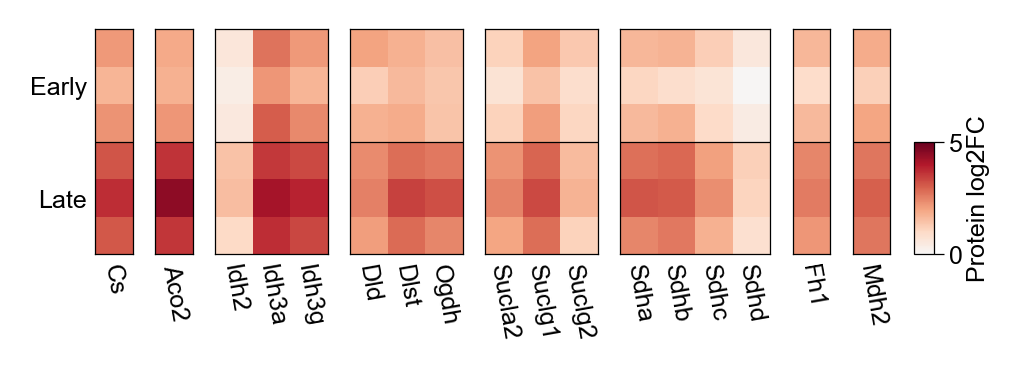

In [22]:
using_cm = copy.copy(cm.get_cmap("RdBu_r"))
using_cm.set_bad('darkgray',1.)

sF = 1 # Size factor
wgap = 0.075
hgap = 0.1
nrow, ncol = 1, len(data_dict)

width_ratios = np.array([len(data_dict[Ez])/4 for Ez in data_dict]) / 2
height_ratios = np.array([6/4]) / 2

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)
row = 0
col = 0
for Ez in data_dict:
    ax = fig.add_subplot(grid[row,col])

    plot_data = data_dict[Ez].drop(columns='uniprot_id').set_index('gene_name', drop=True).T
    heat1 = ax.pcolormesh(plot_data[::-1],
                          cmap=using_cm, vmin=-5, vmax=5)
    ax.axhline(3, c='k', lw=0.3)
    # ax.axhline(6, c='k', lw=0.3)

    ax.set_xticks([i+0.5 for i in range(len(plot_data.columns))])
    ax.set_yticks([]) 
    ax.set_xticklabels(plot_data.columns, rotation=-80, ha='center')
    ax.tick_params(length=0, pad=2)
    # ax.tick_params(width=0.5, length=3, pad=1)

    if col==0:
        ax.set_yticks([1.5, 4.5][::-1]) 
        ax.set_yticklabels(['Early', 'Late'])

        cbar = plt.colorbar(heat1, ax=ax, cax = fig.add_axes([1.03, 0, 0.025, 0.5]), orientation='vertical')
        cbar.ax.set_ylabel('Protein log2FC', labelpad=1, fontsize=6)
        cbar.ax.set_ylim([0, 5])
        cbar.ax.set_yticks([0, 5])
        cbar.ax.tick_params(width=0.3, length=2.5, pad=1)

        # cbar = plt.colorbar(heat1, ax=ax, cax = fig.add_axes([-0.2, -0.15, 0.15, 0.066]), orientation='horizontal')
        # cbar.ax.set_xlabel('Protein log2FC', labelpad=1, fontsize=6)
        # cbar.ax.set_xlim([0, 5])
        # cbar.ax.set_xticks([0, 5])
        # cbar.ax.tick_params(width=0.3, length=2.5, pad=1)

    col+=1


plt.savefig('comp_TCA_PTlogFC_heatmap.pdf', bbox_inches='tight')
plt.show()
plt.close()